EDA dữ liệu, xử lý dữ liệu dạng text, category, xử lý outlierm chạy thuật toán LR, KNN (tune tham số k), SVM (tune tham số kernel, C) cho dữ liệu:
1. 1. https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [248]:
# Regression bao gồm 
# Linear regression 
#  SVR, GPR 
#  Ensemble methods 
# Decision Tree
#  Neurol Networks 


1. Exploratory

1.1
- In shape
- In head
- In quality distribution
1.2 Xem data type và missing values
- Xử lý riêng date time/ object 
- xử lý missing values 
1.3 In column informationl \
1.4 Xem outlier qua các box plot\
1.5 Tính correlation giữa các features 

2. Train test split 
- chia dữ liệu của model \
< from sklearn.model_selection import train_test_split >

3. Scalling feature 
- Gadient decent 
- khoảng cách: thuật toán k-NN regression : lấy k điểm gần nhất -> lấy trung bình cộng để dự đoán dữ liệu mới
+ Standardization: X' = (X - mu)/ sigma
+ Normalization: X' = (X - X_min) / (X_max - X_min)
+ Robust scalling: X' = (X - X_median)/IQR -> giảm bớt outlier 
+ RMSE = sqrt(MSE) mean square error -> cho biết sai số của từng điểm dữ liệu 
RMSE = sqrt(1/n * (y - y^)^2)
-> RMSE càng nhỏ thì model đó càng tốt.

4. Các thuật toán
- SVM: support vecto machine  
- SVR: support vecto regression 
- SVC: support vecto classification 

5. Encoding data 

a) Binary: chỉ có 2 giá trị
ex: male / female 

b) Ordinal: các giá trị có thứ tự 
ex: low/ medium/ high \
ý tưởng: chuyển các giá trị chữ về thành số \
code \ 
encoder = ce.OrdinalEncoder(cols = ['Degree'], return_df = True, mapping = [{'col': 'Degree', 'mapping': {'None': 0, 'Hight school': 1 , 'Diploma': 2}}])

c) Norminal: không có thứ tự 
ex: dog/cat/tiger

5.1 Target Encoding 
- lấy trung bình cộng của các điểm chữ để encoding 

6. Missing values 

6.1. fill gt min 
6.2 fill bằng thuật toán KNN : lấy giá trị gần điểm đó để điền vào NaN 
6.3 dropna bỏ các gt NaN đi 

7. Pipeline 

8. Metrics - dùng để đánh giá model 

R^2 \ 

adjust R^2: càng lớn càng tốt \

MAE: tỉ lệ lỗi (Mean absolute error)

MAPE: mean abdolute percentage error 


 





 


In [249]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [250]:
dt = pd.read_csv("https://raw.githubusercontent.com/hongnhungyknb1925/DATA-PREPARATION-/main/week%207/winequality-red.csv")
dt.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [251]:
dt.shape

(1599, 12)

In [252]:
# information about the data columns
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


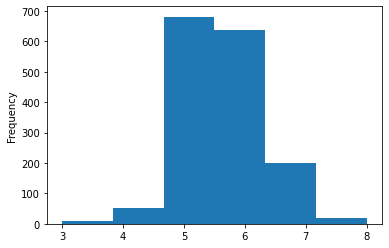

In [253]:
dt['quality'].plot(kind = 'hist',bins = 6 )

In [254]:
# vẽ correaltion 
corr = dt.corr()
corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.12
volatile acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.39
citric acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.23
residual sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,0.01
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.13
free sulfur dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,-0.05
total sulfur dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,-0.19
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.17
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.06
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.25


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


fixed acidity               AxesSubplot(0.125,0.71587;0.168478x0.16413)
volatile acidity         AxesSubplot(0.327174,0.71587;0.168478x0.16413)
citric acid              AxesSubplot(0.529348,0.71587;0.168478x0.16413)
residual sugar           AxesSubplot(0.731522,0.71587;0.168478x0.16413)
chlorides                  AxesSubplot(0.125,0.518913;0.168478x0.16413)
free sulfur dioxide     AxesSubplot(0.327174,0.518913;0.168478x0.16413)
total sulfur dioxide    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
density                 AxesSubplot(0.731522,0.518913;0.168478x0.16413)
pH                         AxesSubplot(0.125,0.321957;0.168478x0.16413)
sulphates               AxesSubplot(0.327174,0.321957;0.168478x0.16413)
alcohol                 AxesSubplot(0.529348,0.321957;0.168478x0.16413)
quality                 AxesSubplot(0.731522,0.321957;0.168478x0.16413)
dtype: object

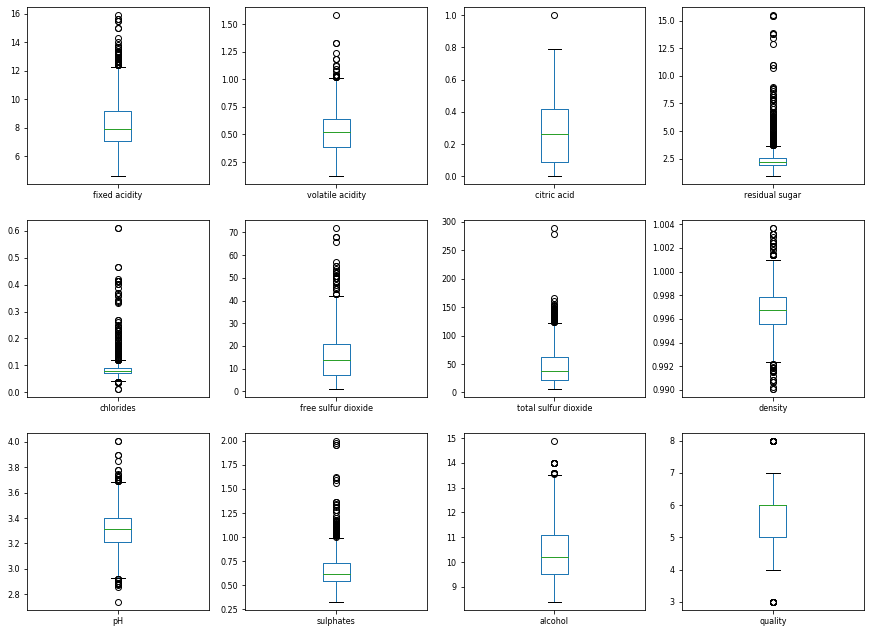

In [255]:
# vẽ boxplot và outlier 
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
dt.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, ax=ax)

In [256]:
from sklearn.model_selection import train_test_split
X = dt.iloc[:,0 :11]
Y = dt[['quality']]
X_train, X_test , y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(len(X_train))

1279


In [257]:
# TH1:  không scaling
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,y_train)
print(model.coef_)
print(model.intercept_)

[[ 2.30853339e-02 -1.00130443e+00 -1.40821461e-01  6.56431104e-03
  -1.80650315e+00  5.62733439e-03 -3.64444893e-03 -1.03515936e+01
  -3.93687732e-01  8.41171623e-01  2.81889567e-01]]
[14.3551052]


In [258]:
predict = model.predict(X_test)
predict = np.transpose(predict)
predict.shape


(1, 320)

In [259]:
y_test= np.transpose(y_test)
y_test.shape

(1, 320)

In [260]:
# tính các chỉ số cần thiết: 
from sklearn import metrics
print('MAS', metrics.mean_absolute_error(y_test,predict))
print('MAPE',metrics.mean_absolute_percentage_error(y_test,predict))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predict)))
print('R-Square',model.score(X_train,y_train))
r2 = model.score(X_train,y_train)
print('Adjust R_square', 1 - ((1 - r2) * (len(X_train) - 1) / (len(X_train) - 11 - 1)) )

MAS 0.5035304415524374
MAPE 0.08991084943366374
RMSE 0.6245199307980126
R-Square 0.347992619352986
Adjust R_square 0.3423319396472897


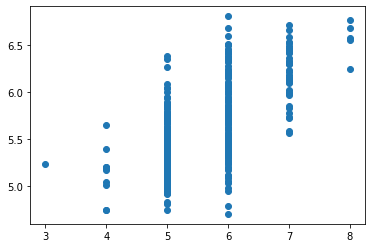

In [261]:
# plot 
plt.scatter(y_test,predict)

mô hình sau khi run thì dự đoán cũng không tốt cho lắm. 

In [262]:
# TH2: bỏ outlier, 
# chỉ lấy các thuộc tính có corr lớn với quality 
# scaling data

In [263]:
dt2 = dt[['fixed acidity','volatile acidity','chlorides','citric acid','sulphates','alcohol','density','total sulfur dioxide','quality']]
cor2 = dt2.corr()
cor2.style.background_gradient(cmap = 'coolwarm').set_precision(2)

,fixed acidity,volatile acidity,chlorides,citric acid,sulphates,alcohol,density,total sulfur dioxide,quality
fixed acidity,1.00,-0.26,0.09,0.67,0.18,-0.06,0.67,-0.11,0.12
volatile acidity,-0.26,1.00,0.06,-0.55,-0.26,-0.20,0.02,0.08,-0.39
chlorides,0.09,0.06,1.00,0.20,0.37,-0.22,0.20,0.05,-0.13
citric acid,0.67,-0.55,0.20,1.00,0.31,0.11,0.36,0.04,0.23
sulphates,0.18,-0.26,0.37,0.31,1.00,0.09,0.15,0.04,0.25
alcohol,-0.06,-0.20,-0.22,0.11,0.09,1.00,-0.50,-0.21,0.48
density,0.67,0.02,0.20,0.36,0.15,-0.50,1.00,0.07,-0.17
total sulfur dioxide,-0.11,0.08,0.05,0.04,0.04,-0.21,0.07,1.00,-0.19
quality,0.12,-0.39,-0.13,0.23,0.25,0.48,-0.17,-0.19,1.00


In [264]:
#  bỏ 'fix acidity' vì có cor lớn với 'citric acid'
dt2 = dt[['volatile acidity','sulphates','alcohol','chlorides','quality','total sulfur dioxide','density']]
dt2.shape

(1599, 7)

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


<function matplotlib.pyplot.show>

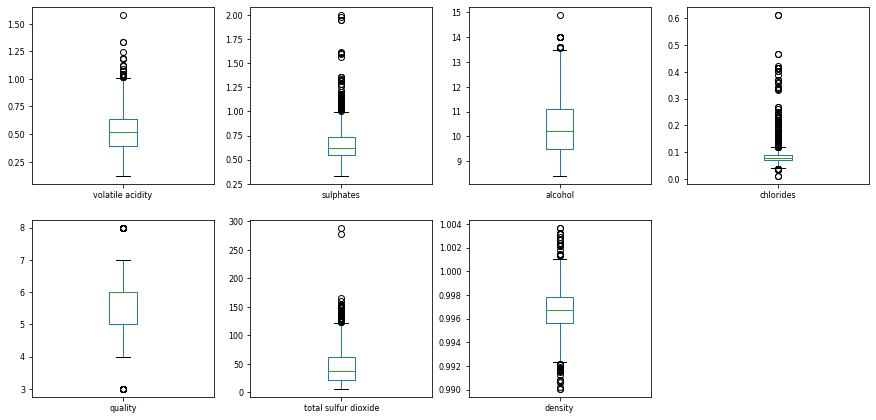

In [265]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
dt2.plot(kind= 'box', subplots = True, layout = (4,4),sharex = False, sharey = False, fontsize = 8, ax = ax)
plt.show

In [266]:
# bỏ outlier 
dt2 = dt2[dt2['sulphates'] < 1.25]
X = dt2[['volatile acidity','sulphates','alcohol','chlorides','total sulfur dioxide','density']]
Y = dt2['quality']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state=25)

In [267]:
mdl2 = LinearRegression().fit(x_train,y_train)
y_predict = mdl2.predict(x_test)

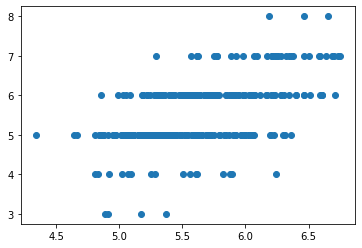

In [268]:

plt.scatter(y_predict,y_test)

In [269]:
from sklearn.metrics import r2_score
print('MAE', metrics.mean_absolute_error(y_test,y_predict))
print('MAPE',metrics.mean_absolute_percentage_error(y_test,y_predict))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R-Square',mdl2.score(x_train,y_train))
r2 = mdl2.score(x_train,y_train)
print('Adjust R_square', 1 - ((1 - r2) * (len(x_train) - 1) / (len(x_train) - 3 - 1)) )

MAE 0.5499407281516981
MAPE 0.10584420067116845
RMSE 0.7039066467055328
R-Square 0.37140803877745576
Adjust R_square 0.3699125781242697


SVR

In [270]:
from sklearn.svm import SVR 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [271]:
regr = make_pipeline(StandardScaler(), SVR(kernel='rbf',C = 1.0, epsilon =0.3))
regr.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.3))])

In [272]:
svr_test_pred = regr.predict(x_test)

In [273]:
print('MAE:', metrics.mean_absolute_error(y_test, svr_test_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_test_pred)))
print('R-Square',regr.score(x_train,y_train))
r2 = regr.score(x_train,y_train)
print('Adjust R_square', 1 - ((1 - r2) * (len(x_train) - 1) / (len(x_train) - 6 - 1)) )

MAE: 0.5375532420585737
MSE: 0.4797011865647241
RMSE: 0.6926046394334391
R-Square 0.49343647955122416
Adjust R_square 0.49102043732332856


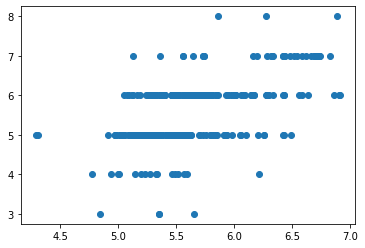

In [274]:

plt.scatter(svr_test_pred,y_test)

In [275]:
from sklearn import  svm, datasets
from sklearn.model_selection import  GridSearchCV
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
parameters={'kernel':['linear','rbf'],'C':[1,10]}
svc=svm.SVR()
clf=GridSearchCV(svc,param_grid=parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf']})

In [276]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [277]:
pred=clf.predict(x_test)

In [278]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R-Square',regr.score(x_train,y_train))
r2 = regr.score(x_train,y_train)
print('Adjust R_square', 1 - ((1 - r2) * (len(x_train) - 1) / (len(x_train) - 6 - 1)) )

MAE: 0.5099955092826188
MSE: 0.4874201359511317
RMSE: 0.6981548080126153
R-Square -0.014076431745437823
Adjust R_square -0.01891304429748275


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [280]:
data = pd.DataFrame({'y_test':y_test,'Predict':pred})
data['y_test']= round(data['Predict'],2)
print(data.head(10))

      y_test   Predict
23      5.11  5.114923
548     5.98  5.982967
127     4.46  4.460355
1378    5.31  5.311771
439     5.19  5.193134
1445    5.01  5.014059
913     6.77  6.765570
412     5.02  5.023493
1505    5.35  5.354026
107     5.11  5.114197


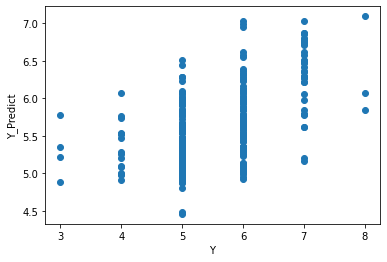

In [279]:
fig, ax = plt.subplots()
ax.scatter(y_test,pred)
ax.set_xlabel('Y')
ax.set_ylabel('Y_Predict')
plt.show()

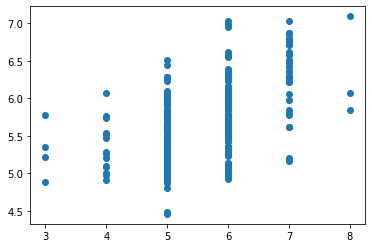

In [281]:
plt.scatter(y_test,pred)